## ANLY 5336 Assignment 2
Author: John Courtright

Instructor: Dr. Emily Zhu

In [39]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Question 1: Austin Airbnb Ratings

In [ ]:
reviews_full = pd.read_csv('Datasets/review_ratings.csv') # Full dataset with missing values
reviews_subset = pd.read_csv('Datasets/Reviews4Cluster.csv') # Subset of 28 listings to compare clustering results
reviews_full.info()

The reviews data set contains 8 variables, 2 being strings and the rest being numerical values representing the listing's review score in a certain category on a scale of 1 to 10. There are 11792 records. 

We'd like to create 3 clusters of listings: Good, Medium, and Bad based on their review scores. The two clustering method's we'll use are Hierarchical and K-Means clustering. 

This data set also contains many records with missing values in one or more features. We'll handle the missing data with 2 different methods: dropping records with missing values and imputing the missing values using a central value, in this case the mode.

We'd like to examine the impact of the different clustering models and different handling methods on this data set. We'll fit four models in this study: Hierachical-Dropped, Hierarchical-Impute, KMean-Dropped, and KMean-Impute. 

To get a better look at the difference between models, we'll use a subset of 28 listings and examine which clusters they are assigned during each model and note any differences.

In [ ]:
num_missing_rows = reviews_full.isnull().any(axis=1).sum()
print(num_missing_rows)

# Drop the string columns for clustering, we only want the numerical review scores
reviews_full = reviews_full.drop(columns=['id', 'host_since'])
# Expected 6 columns now

# Create two copys of the full data set; one with missing values dropped and one with missing values imputed
reviews_dropped = reviews_full.dropna() # expected to be 9136 rows
reviews_imputed = reviews_full.fillna(reviews_full.mode().iloc[0])

reviews_dropped.shape, reviews_imputed.shape

In [5]:
# Hierarchical Clustering Libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Hierarchical Clustering - Dropped Missing Values
# Fit models
hc_full = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_subset = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

reviews_dropped.loc[:,'cluster'] = hc_full.fit_predict(reviews_dropped)
reviews_subset.loc[:,'cluster'] = hc_subset.fit_predict(reviews_subset)

# Add a column to distinguish datasets
reviews_dropped.loc[:,'dataset'] = 'Full Dataset'
reviews_subset.loc[:,'dataset'] = 'Subset'

Because the variables are discrete, the clustering plot will display only single dots. We can add jitter to the scatter plot to help visualize the density of the individual points. Advice courtesy of Dr. Mendez :)

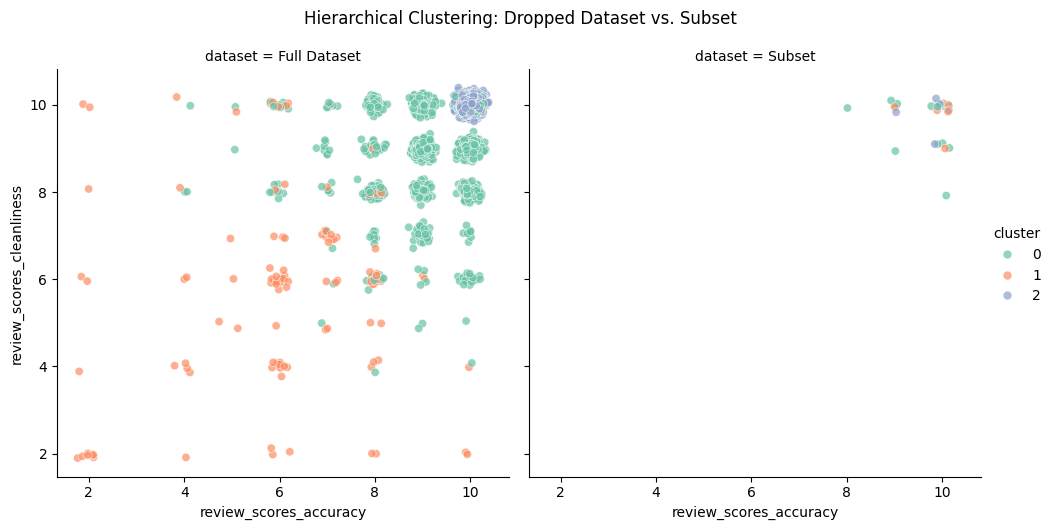

In [7]:
import seaborn as sns
# Combine for one plot
combined = pd.concat([reviews_dropped, reviews_subset])
# Add jitter to both columns
combined_jitter = combined.copy()
combined_jitter[combined.columns[0]] += np.random.normal(0, 0.1, len(combined))
combined_jitter[combined.columns[1]] += np.random.normal(0, 0.1, len(combined))

# Plot using seaborn
sns.relplot(
    data=combined_jitter,
    x=combined.columns[0], # Use original column names for axis labels
    y=combined.columns[1],
    hue='cluster',
    col='dataset',
    palette='Set2',
    alpha=0.7,
    height=5,
    aspect=1
)

plt.suptitle("Hierarchical Clustering: Dropped Dataset vs. Subset", y=1.05)
plt.show()

In [ ]:
subset_dropped = reviews_subset['cluster']
print(subset_dropped)

In [9]:
# Refresh the subset data
reviews_subset = pd.read_csv('Datasets/Reviews4Cluster.csv')

In [10]:
# Hierarchical Clustering - Imputed Missing Values
# Fit models
hc_imputed = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_subset2 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

reviews_imputed.loc[:,'cluster'] = hc_imputed.fit_predict(reviews_imputed)
reviews_subset.loc[:,'cluster'] = hc_subset2.fit_predict(reviews_subset)

# Add a column to distinguish datasets
reviews_imputed.loc[:,'dataset'] = 'Imputed Dataset'
reviews_subset.loc[:,'dataset'] = 'Subset'

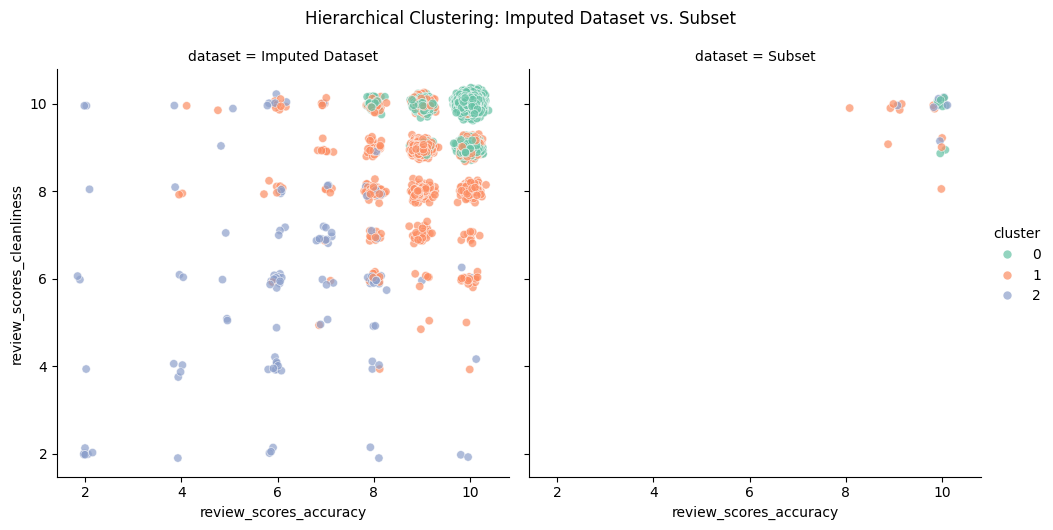

In [40]:
# Combine for one plot
combined = pd.concat([reviews_imputed, reviews_subset])
# Add jitter to both columns
combined_jitter = combined.copy()
combined_jitter[combined.columns[0]] += np.random.normal(0, 0.1, len(combined))
combined_jitter[combined.columns[1]] += np.random.normal(0, 0.1, len(combined))

# Plot using seaborn
sns.relplot(
    data=combined_jitter,
    x=combined.columns[0], # Use original column names for axis labels
    y=combined.columns[1],
    hue='cluster',
    col='dataset',
    palette='Set2',
    alpha=0.7,
    height=5,
    aspect=1
)

plt.suptitle("Hierarchical Clustering: Imputed Dataset vs. Subset", y=1.05)
plt.show()

In [ ]:
subset_imputed = reviews_subset['cluster']
print(subset_dropped)

In [13]:
# Refresh Data Sets
reviews_full = pd.read_csv('Datasets/review_ratings.csv')
reviews_full = reviews_full.drop(columns=['id', 'host_since'])

reviews_dropped = reviews_full.dropna() # expected to be 9136 rows
reviews_imputed = reviews_full.fillna(reviews_full.mode().iloc[0])

reviews_subset = pd.read_csv('Datasets/Reviews4Cluster.csv')

In [14]:
# KMeans Libraries
from sklearn.cluster import KMeans

# Define a random seed for reproducibility
RSEED = 1216

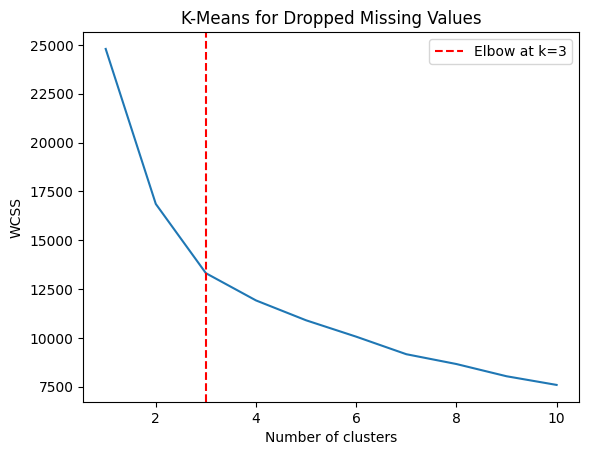

In [15]:
# KMeans Clustering - Dropped

# Generate Elbow Plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_init=10, n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(reviews_dropped)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('K-Means for Dropped Missing Values')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# The plot shows the elbow at 3 clusters
plt.axvline(x=3, color='red', linestyle='--', label='Elbow at k=3')
plt.legend()

plt.show()

In [ ]:
# Fit KMeans (Dropped) with 3 Clusters
kmeans_dropped = KMeans(n_init=10, n_clusters=3, init='k-means++', random_state=RSEED)
reviews_dropped.loc[:,'cluster'] = kmeans_dropped.fit_predict(reviews_dropped)

# Fit with Subset
kmeans_subset = KMeans(n_init=10, n_clusters=3, init='k-means++', random_state=RSEED)
reviews_subset.loc[:,'cluster'] = kmeans_subset.fit_predict(reviews_subset)

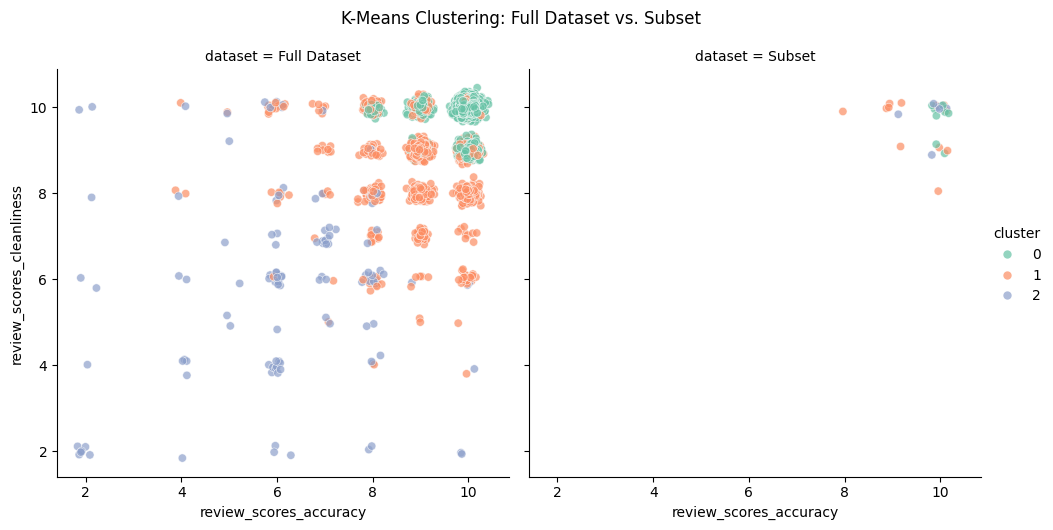

In [38]:
# Plot the results

# Add columns to distinguish data sets
reviews_dropped.loc[:,'dataset'] = 'Full Dataset'
reviews_subset.loc[:,'dataset'] = 'Subset'

# Combine for one plot
combined = pd.concat([reviews_dropped, reviews_subset])

# Add jitter to both columns
combined_jitter = combined.copy()
combined_jitter[combined.columns[0]] += np.random.normal(0, 0.1, len(combined)) 
combined_jitter[combined.columns[1]] += np.random.normal(0, 0.1, len(combined))

# Plot using seaborn
sns.relplot(
    data=combined_jitter,
    x=combined.columns[0], # Use original column names for axis labels
    y=combined.columns[1],
    hue='cluster',
    col='dataset',
    palette='Set2',
    alpha=0.7,
    height=5,
    aspect=1
)

plt.suptitle("K-Means Clustering: Full Dataset vs. Subset", y=1.05)
plt.show()

In [ ]:
subset_dropped2 = reviews_subset['cluster']
print(subset_dropped2)

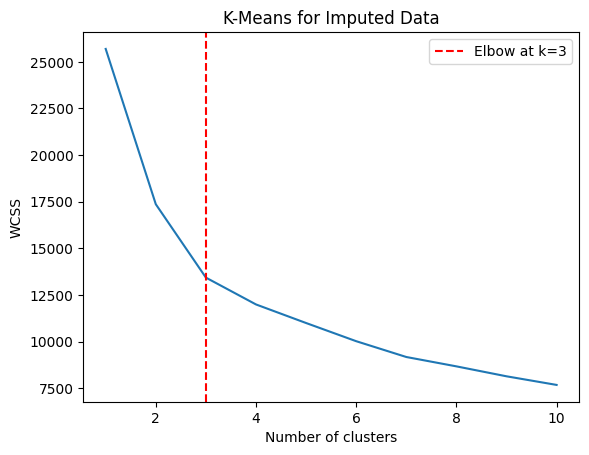

In [19]:
# KMeans Clustering - Imputed
# Generate Elbow Plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_init=10, n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(reviews_imputed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('K-Means for Imputed Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# The plot shows the elbow at 3 clusters
plt.axvline(x=3, color='red', linestyle='--', label='Elbow at k=3')
plt.legend()

plt.show()

In [20]:
# Refresh the subset data
reviews_subset = pd.read_csv('Datasets/Reviews4Cluster.csv')

In [21]:
# Fit KMeans (Imputed) with 3 Clusters
kmeans_imputed = KMeans(n_init=10, n_clusters=3, init='k-means++', random_state=RSEED)
reviews_imputed.loc[:,'cluster'] = kmeans_imputed.fit_predict(reviews_imputed)

# Fit with Subset
kmeans_subset = KMeans(n_init=10, n_clusters=3, init='k-means++', random_state=RSEED)
reviews_subset.loc[:,'cluster'] = kmeans_subset.fit_predict(reviews_subset)

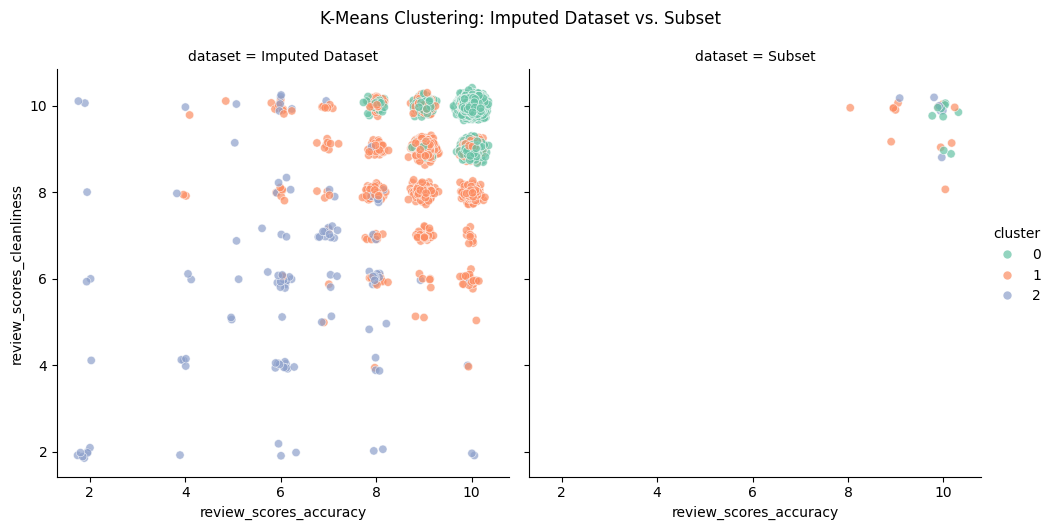

In [22]:
# Plot the results

# Add columns to distinguish data sets
reviews_imputed.loc[:,'dataset'] = 'Imputed Dataset'
reviews_subset.loc[:,'dataset'] = 'Subset'

# Combine for one plot
combined = pd.concat([reviews_imputed, reviews_subset])

# Add jitter to both columns
combined_jitter = combined.copy()
combined_jitter[combined.columns[0]] += np.random.normal(0, 0.1, len(combined)) 
combined_jitter[combined.columns[1]] += np.random.normal(0, 0.1, len(combined))

# Plot using seaborn
sns.relplot(
    data=combined_jitter,
    x=combined.columns[0], # Use original column names for axis labels
    y=combined.columns[1],
    hue='cluster',
    col='dataset',
    palette='Set2',
    alpha=0.7,
    height=5,
    aspect=1
)

plt.suptitle("K-Means Clustering: Imputed Dataset vs. Subset", y=1.05)
plt.show()

In [ ]:
subset_imputed2 = reviews_subset['cluster']
print(subset_imputed2)

Now that we've fit all our models and tested them with the subset data, let's compare how they sorted our subset of 28 listings:

In [24]:
# Create a DataFrame to compare cluster assignments for the subset
comparison_df = pd.DataFrame({
    'Hierarchical Dropped': subset_dropped.values,
    'Hierarchical Imputed': subset_imputed.values,
    'KMeans Dropped': subset_dropped2.values,
    'KMeans Imputed': subset_imputed2.values
})

comparison_df.index.name = 'Listing'
print(comparison_df.to_string())

         Hierarchical Dropped  Hierarchical Imputed  KMeans Dropped  KMeans Imputed
Listing                                                                            
0                           0                     0               1               1
1                           0                     0               1               1
2                           0                     0               1               1
3                           0                     0               0               0
4                           0                     0               2               2
5                           1                     1               0               0
6                           2                     2               1               1
7                           0                     0               1               1
8                           0                     0               1               1
9                           0                     0               0         

## Clustering Analysis

Based on our hierarchical and KMeans clustering, we've found 3 clusters of listings based on their comprehensive review score. Cluster 0 is our 'Good' listings, with most of their scores equaling or within 1-2 points of 10. Cluster 1 is our 'Medium' listings, with some high scores but averaging around 7-8. Cluster 2 is our 'Bad' listings, with a variety of review scores that range from around 0-7. 

Cluster 0 was incredibly dense in all models, showing that a lot of listings had good reviews with most of their scores equaling 10 or more. Cluster 1 began to spread out more while Cluster 2 was incredibly scattered. The density of a cluster represents the model was ble to more strongly consolidate observations. Because Cluster 2 and 1 are more scattered, it's more difficult to draw sweeping observations about the listings in them because their features are so different. 

When comparing the clustering results of our subset with different methods, we see that many listings were clustered differently based on if the model was hierarchical or KMeans. There were no observations where the cluster changed between models with dropped data and models with imputed data. 

Regarding the KMeans Within-Cluster-Sum-of-Squares, we can see that the WCSS is still rather high at 3 clusters. Even though the 'elbow' of the plot falls at x=3, the WCSS continues to fall with a decent slope. Another mini elbow appears at x-7. It might be worth experimenting with different numbers of clusters to see if we can further categorize our 'bad' listings. 

## Question 2: How Does Weather Affect Traffic Volumes?

Working with data from: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

In [25]:
traffic_df = pd.read_csv('Datasets/Metro_Interstate_Traffic_AMPeak_cleaned.csv')

We want to examine the effect of various weather effects on traffic volume. The data set we are working with is a subset of the UCI Traffic Volume data set that is filtered down to only include observations at 8:00 AM only. 

To examine this relationship, we'll construct 2 multivariate linear regression models; One model including more predictors than the other. Our response variable in both will be traffic volume. Our predictors will include: weekend (if the date is a weekend day or holiday), temperature, cloud coverage, and snowfall amount

The equations for our models can be represented as:

## Model 1: traffic_volume = b0 + b1(weekend) + b2(clouds_all) + b3(temp) + b4(snow_1h)
## Model 2: traffic_volume = b0 + b1(weekend) + b2 (clouds_all) + b3(snow_1h)

We will compare the two models in terms of statistical significance with R² and Adjusted R² and predicting power with out-of-sample RMSE. We will partition the data into 80% training and 20% testing sets.

In [26]:
# Libraries for Regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
traffic_df.info()

In [28]:
# Partition data into 80% training and 20% testing sets
train_df, test_df = train_test_split(traffic_df, test_size=0.2, random_state=RSEED)

In [29]:
# Model 1: traffic_volume = b0 + b1(weekend) + b2(clouds_all) + b3(temp) + b4(snow_1h)
x1 = train_df[['weekend', 'clouds_all', 'temp', 'snow_1h']]
y1 = train_df['traffic_volume']
x1 = sm.add_constant(x1)

model1 = sm.OLS(y1, x1).fit()
print(model1.summary())

# Calculate RMSE
x1_test = test_df[['weekend', 'clouds_all', 'temp', 'snow_1h']]
y1_test = test_df['traffic_volume']
x1_test = sm.add_constant(x1_test)
y1_pred = model1.predict(x1_test)

rmse1 = np.sqrt(np.mean((y1_test - y1_pred) ** 2))
print(f'Model 1 RMSE: {rmse1}')

                            OLS Regression Results                            
Dep. Variable:         traffic_volume   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     716.2
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          1.21e-274
Time:                        13:09:03   Log-Likelihood:                -7152.4
No. Observations:                 883   AIC:                         1.431e+04
Df Residuals:                     878   BIC:                         1.434e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3302.5368    635.456      5.197      0.0

In [30]:
# Model 2: traffic_volume = b0 + b1(weekend) + b2 (clouds_all) + b3(snow_1h)
x2 = train_df[['weekend', 'clouds_all', 'snow_1h']]
y2 = train_df['traffic_volume']
x2 = sm.add_constant(x2)

model2 = sm.OLS(y2, x2).fit()
print(model2.summary())

# Calculate RMSE
x2_test = test_df[['weekend', 'clouds_all', 'snow_1h']]
y2_test = test_df['traffic_volume']
x2_test = sm.add_constant(x2_test)
y2_pred = model2.predict(x2_test)

rmse2 = np.sqrt(np.mean((y2_test - y2_pred) ** 2))
print(f'Model 2 RMSE: {rmse2}')

                            OLS Regression Results                            
Dep. Variable:         traffic_volume   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     938.3
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          1.94e-273
Time:                        13:09:03   Log-Likelihood:                -7158.8
No. Observations:                 883   AIC:                         1.433e+04
Df Residuals:                     879   BIC:                         1.434e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5556.7592     44.866    123.852      0.0

After constructing our models, here are our final equations and significance and prediction values:

In [31]:
# Model 1 Formula:
b0, b1, b2, b3, b4 = model1.params
print(f'Model 1 Equation: traffic_volume = {b0:.2f} + {b1:.2f}(weekend) + {b2:.2f}(clouds_all) + {b3:.2f}(temp) + {b4:.2f}(snow_1h)')

# Model 2 Formula:
bo, b1, b2, b3 = model2.params
print(f'Model 2 Equation: traffic_volume = {bo:.2f} + {b1:.2f}(weekend) + {b2:.2f}(clouds_all) + {b3:.2f}(snow_1h)')

# Significance and Prediction Values
print(f'Model 1: R-squared = {model1.rsquared:.2f}, Adjusted R-squared = {model1.rsquared_adj:.2f}, RMSE = {rmse1:.2f}')
print(f'Model 2: R-squared = {model2.rsquared:.2f}, Adjusted R-squared = {model2.rsquared_adj:.2f}, RMSE = {rmse2:.2f}')

Model 1 Equation: traffic_volume = 3302.54 + -3107.62(weekend) + -1.37(clouds_all) + 8.03(temp) + -22178.79(snow_1h)
Model 2 Equation: traffic_volume = 5556.76 + -3111.19(weekend) + -1.43(clouds_all) + -23145.20(snow_1h)
Model 1: R-squared = 0.77, Adjusted R-squared = 0.76, RMSE = 812.07
Model 2: R-squared = 0.76, Adjusted R-squared = 0.76, RMSE = 811.25


## Regression Analysis

In model 1, 77% of the variation in traffic volume could be explained by if it was a weekend day, the cloud coverage, temperature, and amount of snowfall. 

In model 2, 76% of the variation in traffic volume could be explained by if it was a weekend day, the cloud coverage and amount of snowfall. 

The models' statistical significance and prediction power are quite similar. Model 1's R² value is marginally higher, showing it better explains variance. Model 2 excludes temperature and had a lower RMSE, meaning it has better predicting power. 

Model 1 is slightly better at explaining variability (R²), while Model 2 is slightly better for prediction (RMSE). The differences are minimal, so both models are comparable.

## Question 3: Can we Predict Average Weekly Temeprature?

In [32]:
# Refresh our dataset
traffic_df = pd.read_csv('Datasets/Metro_Interstate_Traffic_AMPeak_cleaned.csv')

We'd like to construct a time-series of our temperature variable in order to predict the average weekly temeperature. 

First we'll resample the 'temp' variable based on weekly frequency. Our 'date' variable needs to be converted to date-time format first. We also need to set

In [ ]:
# Convert to date-time and set as index
traffic_df['date'] = pd.to_datetime(traffic_df['date'])
traffic_df.set_index('date', inplace=True)

# Resample 'temp' variable based on weekly frequency and calculate the mean
temp_df = traffic_df['temp'].resample('W').mean()
temp_df.head()

Next, we'll decompose the time series using both the additive and multiplicitve forms to compare the results. 

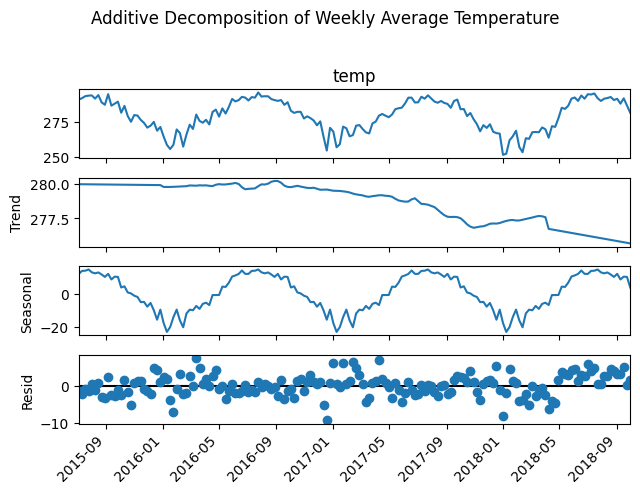

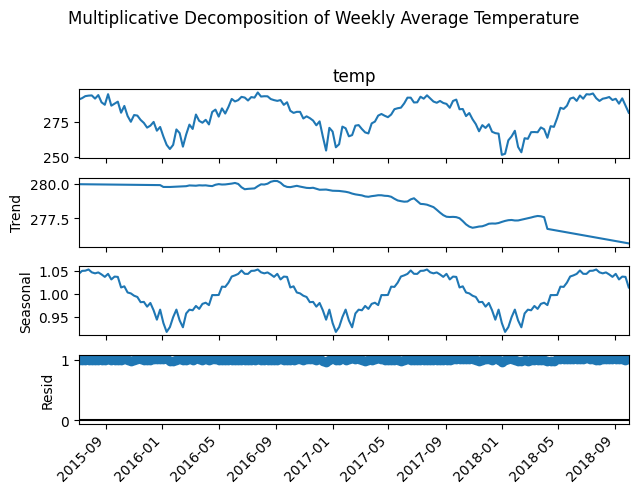

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
additive_decomp = seasonal_decompose(temp_df, model='additive', extrapolate_trend='freq')
# Muiltiplicative Decomposition
multiplicative_decomp = seasonal_decompose(temp_df, model='multiplicative', extrapolate_trend='freq')

# Plot Additive
fig1 = additive_decomp.plot()
fig1.suptitle('Additive Decomposition of Weekly Average Temperature', y=1.02)

# Rotate x-axis labels for each subplot
for ax in fig1.axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

fig1.tight_layout()
plt.show()

# Plot Multiplicative
fig2 = multiplicative_decomp.plot()
fig2.suptitle('Multiplicative Decomposition of Weekly Average Temperature', y=1.02)

# Rotate x-axis labels for each subplot
for ax in fig2.axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

fig2.tight_layout()
plt.show()

From these visuals, we can see that temperature tends to plataeu near 280 degrees K in the spring/summer months then gradually falls beginning around mid July. 

In the seasonal component, both methods display similar results. The seasonal amplitude remains constant, which indicates the additive model is the best fit. 

In the residual component, the residuals for the additive model appear to be randomly scattered around 0 with no clear trend. In the multiplicative model, the residuals all fall near +1. This again indicates that the additive model is the best fit. 

Next, we'll cross validate the RMSE on the latter 30% of the time-series. Cross-validation is done in order to evaluate how well our time-series can predict future values. Because we are concerned with predicting weekly average temperature, this step will help us judge how accurate our prediction may be.

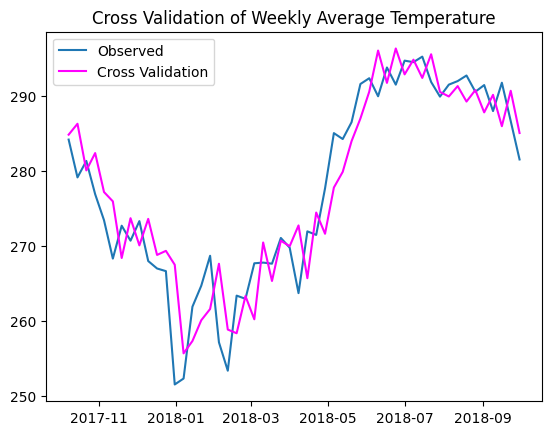

In [35]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

# Split the data (70% train, 30% test)
train = temp_df.iloc[:int(0.7*len(temp_df))]
test = temp_df.iloc[int(0.7*len(temp_df)):]

train = train.tolist() # Convert to list for appending

# Fit the model
predictions = []
for i in range(len(test)):
    sel = ar_select_order(train, 13, old_names=False)
    sel.ar_lags
    model_fit = sel.model.fit()
    pred = model_fit.predict(start=len(train), end=len(train), dynamic=False)
    predictions.append(pred[0])
    train.append(test.iloc[i])
cross_val = pd.Series(predictions, index=test.index)

# Plot the results
plt.plot(test, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation')
plt.title('Cross Validation of Weekly Average Temperature')
plt.legend()
plt.show()

In [36]:
from sklearn import metrics

# Calculate RMSE for cross-validation
rmse_cv = np.sqrt(metrics.mean_squared_error(test, cross_val))
print(f'Cross-Validation RMSE: {rmse_cv:.2f} degrees K')

Cross-Validation RMSE: 4.97 degrees K


On average, the predicted weekly temperature is about 5 K off, which is roughly 1.7% of the typical weekly temperature. This indicates the model is reasonably accurate for forecasting weekly temperatures.

We can see from the plot that the cross-validation line lines up fairly well with the observed temperatures. 

Let's test out the model by predicting the average weekly temperature for the next year, starting on October 7th, 2018. 

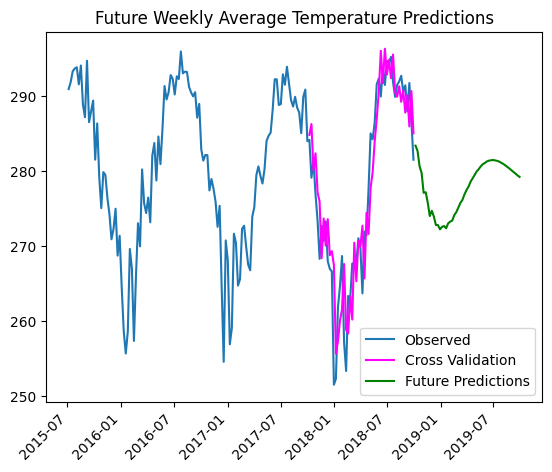

In [37]:
# Predict the next year's weekly average temperature, starting from October 7th, 2018
future_predictions = []
future_train = temp_df.tolist() # Start with the full dataset
future_dates = pd.date_range(start='2018-10-07', periods=52, freq='W')

# Predict 52 weeks into the future
for i in range(52):
    sel = ar_select_order(future_train, 13, old_names=False) 
    sel.ar_lags
    model_fit = sel.model.fit()
    pred = model_fit.predict(start=len(future_train), end=len(future_train), dynamic=False)
    future_predictions.append(pred[0]) 
    future_train.append(pred[0])
future_pred_series = pd.Series(future_predictions, index=future_dates)

# Plot the future predictions
plt.plot(temp_df, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation')
plt.plot(future_pred_series, color='green', label='Future Predictions')
plt.title('Future Weekly Average Temperature Predictions')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()